In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, Normalizer

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

%matplotlib notebook

# Import csv file to dataframe df

In [34]:
df_raw = pd.read_csv("June2019.csv")
df = df_raw.copy()

# Calculate number of samples, m, and number of features, n

In [35]:
m,n = df.shape
print("Number of samples: ",m)
print("Number of features: ",n)

Number of samples:  9902
Number of features:  49


# Inspect df head

In [36]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,06/08/2010,within an hour,100%,t,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Churchtown,Dn Laoghaire-Rathdown,t,Bed and breakfast,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$50.00,NaN,NaN,NaN,$10.00,1,$0.00,3.0,60.0,276,202,46,20/03/2011,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,moderate,t,t,3,2.01
1,08/01/2011,within an hour,100%,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Temple Bar,Dublin City,t,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",0.0,$88.00,NaN,NaN,NaN,NaN,1,$42.00,3.0,30.0,222,102,6,04/04/2011,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,moderate,t,t,1,1.02
2,18/08/2010,within a few hours,80%,f,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Ballsbridge,Dublin City,f,Cabin,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Indoor f...",1076.0,$130.00,$675.00,"$2,335.00",$300.00,$25.00,2,$10.00,3.0,28.0,81,172,13,25/02/2011,96.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,f,2,1.70
3,27/03/2011,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Templeogue,South Dublin,t,House,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",NaN,$30.00,$200.00,$700.00,NaN,NaN,1,$10.00,1.0,5.0,175,1,1,11/05/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f,1,0.65
4,06/08/2010,within an hour,100%,t,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Churchtown,Dn Laoghaire-Rathdown,t,Bed and breakfast,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Free parking on premises"",""Smo...",NaN,$50.00,NaN,NaN,$0.00,$10.00,1,$0.00,3.0,14.0,0,148,40,24/05/2011,96.0,10.0,10.0,10.0,10.0,9.0,10.0,f,t,f,moderate,t,t,3,1.50


In [37]:
drop_cols = ["first_review","neighbourhood", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin","review_scores_communication", "review_scores_location", "review_scores_value"]
df.drop(drop_cols, axis=1, inplace=True)

# Clean up price data
Remove dollar sign "\\$" from any price data \
Also remove commas eg. $1,000 >> 1000

In [38]:
column_name = "price"
new_column = df[column_name].astype(str)
new_column = [s.replace('$', '', 1) for s in new_column]
new_column = [s.replace(',', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
df[column_name] = new_column

column_name = "weekly_price"
new_column = df[column_name].astype(str)
new_column = [s.replace('$', '', 1) for s in new_column]
new_column = [s.replace(',', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
df[column_name] = new_column

column_name = "monthly_price"
new_column = df[column_name].astype(str)
new_column = [s.replace('$', '', 1) for s in new_column]
new_column = [s.replace(',', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
df[column_name] = new_column

column_name = "security_deposit"
new_column = df[column_name].astype(str)
new_column = [s.replace('$', '', 1) for s in new_column]
new_column = [s.replace(',', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
df[column_name] = new_column

column_name = "cleaning_fee"
new_column = df[column_name].astype(str)
new_column = [s.replace('$', '', 1) for s in new_column]
new_column = [s.replace(',', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
df[column_name] = new_column

column_name = "extra_people"
new_column = df[column_name].astype(str)
new_column = [s.replace('$', '', 1) for s in new_column]
new_column = [s.replace(',', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
df[column_name] = new_column

# clean up host_response_rate
Remove percent symbol, '%' from rate column and express as a decimal \
eg. 87% >> 0.87

In [39]:
column_name = "host_response_rate"
new_column = df[column_name].astype(str)
new_column = [s.replace('%', '', 1) for s in new_column]
new_column = np.array(new_column).astype(float)
new_column = [s/100.0 for s in new_column]
df[column_name] = new_column

# Inspect df

In [40]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,06/08/2010,within an hour,1.0,t,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Dn Laoghaire-Rathdown,t,Bed and breakfast,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,50.0,NaN,NaN,NaN,10.0,1,0.0,3.0,60.0,276,202,46,95.0,f,t,f,moderate,t,t,3,2.01
1,08/01/2011,within an hour,1.0,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Dublin City,t,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",0.0,88.0,NaN,NaN,NaN,NaN,1,42.0,3.0,30.0,222,102,6,99.0,f,f,f,moderate,t,t,1,1.02
2,18/08/2010,within a few hours,0.8,f,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Dublin City,f,Cabin,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Indoor f...",1076.0,130.0,675.0,2335.0,300.0,25.0,2,10.0,3.0,28.0,81,172,13,96.0,f,f,f,strict_14_with_grace_period,t,f,2,1.70
3,27/03/2011,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,South Dublin,t,House,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",NaN,30.0,200.0,700.0,NaN,NaN,1,10.0,1.0,5.0,175,1,1,NaN,f,f,f,flexible,f,f,1,0.65
4,06/08/2010,within an hour,1.0,t,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Dn Laoghaire-Rathdown,t,Bed and breakfast,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Free parking on premises"",""Smo...",NaN,50.0,NaN,NaN,0.0,10.0,1,0.0,3.0,14.0,0,148,40,96.0,f,t,f,moderate,t,t,3,1.50


# Create 'n_verifications' and 'n_amenities' features
Instead of analyzing the specific verification types used and the types of amenities available we instead use simplified features that express the total number of verifications or amenities available. \

eg. amenities = ["Internet","TV","Parking"] >>> n_amenities = 3

#### Then drop "host_verifications" and "amenities"

In [41]:
n_verifications = []
n_amenities = []

for i in df.index.tolist():
    # Count the number of columns used to separate the individual components and add 1.
    n_verifications.append(df.loc[i]["host_verifications"].count(',')+1)
    n_amenities.append(df.loc[i]["amenities"].count(',')+1)
    
df["n_verifications"] = n_verifications
df["n_amenities"] = n_amenities


# Inspect df

In [42]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,n_verifications,n_amenities
0,06/08/2010,within an hour,1.0,t,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Dn Laoghaire-Rathdown,t,Bed and breakfast,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,50.0,NaN,NaN,NaN,10.0,1,0.0,3.0,60.0,276,202,46,95.0,f,t,f,moderate,t,t,3,2.01,9,38
1,08/01/2011,within an hour,1.0,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Dublin City,t,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",0.0,88.0,NaN,NaN,NaN,NaN,1,42.0,3.0,30.0,222,102,6,99.0,f,f,f,moderate,t,t,1,1.02,3,28
2,18/08/2010,within a few hours,0.8,f,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Dublin City,f,Cabin,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Indoor f...",1076.0,130.0,675.0,2335.0,300.0,25.0,2,10.0,3.0,28.0,81,172,13,96.0,f,f,f,strict_14_with_grace_period,t,f,2,1.70,7,34
3,27/03/2011,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,South Dublin,t,House,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",NaN,30.0,200.0,700.0,NaN,NaN,1,10.0,1.0,5.0,175,1,1,NaN,f,f,f,flexible,f,f,1,0.65,3,15
4,06/08/2010,within an hour,1.0,t,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,Dn Laoghaire-Rathdown,t,Bed and breakfast,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Free parking on premises"",""Smo...",NaN,50.0,NaN,NaN,0.0,10.0,1,0.0,3.0,14.0,0,148,40,96.0,f,t,f,moderate,t,t,3,1.50,9,22


# Recode any True/False features as 1/0

In [43]:
tf_cols = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "is_location_exact", "requires_license", "instant_bookable", "is_business_travel_ready", "require_guest_profile_picture", "require_guest_phone_verification"]

for col in tf_cols:
    df.loc[:][col][df[col]=="t"] = 1
    df.loc[:][col][df[col]=="f"] = 0

# Inspect the number of NaN values present per feature

<IPython.core.display.Javascript object>


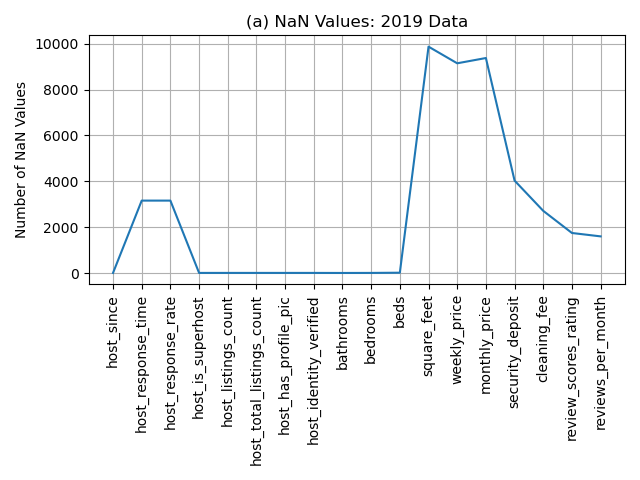

In [44]:
n_nan = []
nan_cols = []
n_cols = len(df.columns.tolist())

for col in df.columns.tolist():
    if df[col].isna().sum() > 0:
        nan_cols.append(col)
        n_nan.append(df[col].isna().sum())
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n_nan)
ax.set_title("(a) NaN Values: 2019 Data")
ax.set_ylabel("Number of NaN Values")
ax.set_xticks(list(range(0,len(n_nan))))
ax.set_xticklabels(nan_cols, rotation=90)
ax.grid("on")
plt.tight_layout()

Square feet is almost entirely NaN values: drop \
Weekly price and monthly price almost entirely NaN values : drop weekly_price and monthly_price  
Security deposit has a lot of NaN but can assume NaN means no deposit cost : set security_deposit NaN to 0  
Cleaning_fee has a lot of NaN but can assume NaN means no deposit cost : set cleaning_fee NaN to 0  
  
#### Review_scores_rating is the dependent variable in this analysis
Not sure of the nature of why they are NaN.  Have they never been reviewed?? Never had a customer?  Is a zero suitable??  
Might be safest to drop those NaN samples.  Still ~ 7000 samples remaining

## Drop square_feet, weekly_price and monthly_price features, and drop all review_scores_rating NaN samples >>>then inspect again

In [45]:
drop_cols = ["square_feet", "weekly_price", "monthly_price", "host_response_time", "host_response_rate"]
df.drop(drop_cols, axis=1, inplace = True) 

df['security_deposit'] = df['security_deposit'].fillna(0)
df['security_deposit']

df['cleaning_fee'] = df['cleaning_fee'].fillna(0)
df['cleaning_fee']

nan_index = df[df["review_scores_rating"].isna()].index
nan_index
df.drop(nan_index, inplace = True) 

# Inspect the number of NaN values present per feature

Number of samples:  8156
Number of features:  38


<IPython.core.display.Javascript object>


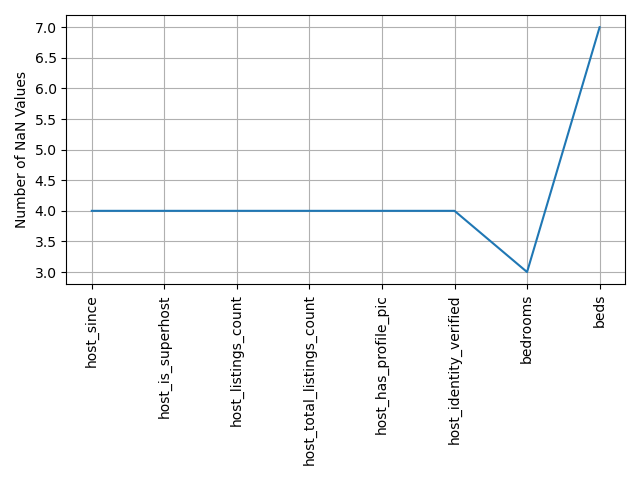

In [46]:
m,n = df.shape
print("Number of samples: ",m)
print("Number of features: ",n)

n_nan = []
nan_cols = []
n_cols = len(df.columns.tolist())

for col in df.columns.tolist():
    if df[col].isna().sum() > 0:
        nan_cols.append(col)
        n_nan.append(df[col].isna().sum())
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n_nan)
ax.set_ylabel("Number of NaN Values")
ax.set_xticks(list(range(0,len(n_nan))))
ax.set_xticklabels(nan_cols, rotation=90)
ax.grid("on")
plt.tight_layout()

In [47]:
n_wnan = df.shape[0]
print("Number of samples before drop na:", n_wnan)

df.dropna(inplace=True)
n_wonan = df.shape[0]
print("Number of samples before drop na:", n_wonan)

m,n = df.shape
print("Number of samples: ",m)
print("Number of features: ",n)

Number of samples before drop na: 8156
Number of samples before drop na: 8143
Number of samples:  8143
Number of features:  38


In [48]:
n_wnan - n_wonan

13

In [17]:
df["host_since"] = pd.to_datetime(df["host_since"],infer_datetime_format=True)

ix_date_sorted = df.index

df["host_since_recode"] = np.zeros(m)
df.loc[ix_date_sorted[0], "host_since_recode"] = 0

#df.head()

from datetime import datetime

prev_ix = ix_date_sorted[0]

for ix in ix_date_sorted[1::]:
    a = df.loc[prev_ix, "host_since"]
    b = df.loc[ix, "host_since"]
    
    delta = b - a
    
    df.loc[ix, "host_since_recode"] = df.loc[prev_ix, "host_since_recode"] + delta.days
    
    prev_ix = ix
    
    #print(delta.days)
    
df.head()    

,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,n_verifications,n_amenities,host_since_recode
0,2010-06-08,1,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,0,Dn Laoghaire-Rathdown,1,Bed and breakfast,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",50.0,0.0,10.0,1,0.0,3.0,60.0,276,202,46,95.0,0,1,0,moderate,1,1,3,2.01,9,38,0.0
1,2011-08-01,0,1.0,1.0,"['email', 'phone', 'reviews']",1,0,Dublin City,1,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",88.0,0.0,0.0,1,42.0,3.0,30.0,222,102,6,99.0,0,0,0,moderate,1,1,1,1.02,3,28,419.0
2,2010-08-18,0,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,1,Dublin City,0,Cabin,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Indoor f...",130.0,300.0,25.0,2,10.0,3.0,28.0,81,172,13,96.0,0,0,0,strict_14_with_grace_period,1,0,2,1.70,7,34,71.0
4,2010-06-08,1,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,0,Dn Laoghaire-Rathdown,1,Bed and breakfast,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Free parking on premises"",""Smo...",50.0,0.0,10.0,1,0.0,3.0,14.0,0,148,40,96.0,0,1,0,moderate,1,1,3,1.50,9,22,0.0
5,2011-04-17,1,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,0,Dublin City,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Gym,Breakfast,Elevator,""Buzzer/w...",60.0,500.0,30.0,1,35.0,2.0,100.0,0,40,5,96.0,0,1,0,strict_14_with_grace_period,0,0,1,1.01,9,18,313.0


In [18]:
df.drop("host_since", axis=1, inplace=True)
df.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,n_verifications,n_amenities,host_since_recode
0,1,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,0,Dn Laoghaire-Rathdown,1,Bed and breakfast,Private room,2,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",50.0,0.0,10.0,1,0.0,3.0,60.0,276,202,46,95.0,0,1,0,moderate,1,1,3,2.01,9,38,0.0
1,0,1.0,1.0,"['email', 'phone', 'reviews']",1,0,Dublin City,1,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",88.0,0.0,0.0,1,42.0,3.0,30.0,222,102,6,99.0,0,0,0,moderate,1,1,1,1.02,3,28,419.0
2,0,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,1,Dublin City,0,Cabin,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Indoor f...",130.0,300.0,25.0,2,10.0,3.0,28.0,81,172,13,96.0,0,0,0,strict_14_with_grace_period,1,0,2,1.70,7,34,71.0
4,1,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,0,Dn Laoghaire-Rathdown,1,Bed and breakfast,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Free parking on premises"",""Smo...",50.0,0.0,10.0,1,0.0,3.0,14.0,0,148,40,96.0,0,1,0,moderate,1,1,3,1.50,9,22,0.0
5,1,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,0,Dublin City,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Gym,Breakfast,Elevator,""Buzzer/w...",60.0,500.0,30.0,1,35.0,2.0,100.0,0,40,5,96.0,0,1,0,strict_14_with_grace_period,0,0,1,1.01,9,18,313.0


In [6]:
display(df['amenities'])

column_name = "amenities"
new_column = df[column_name].astype(str)
new_column = [s.replace('{', '') for s in new_column]
new_column = [s.replace('}', '') for s in new_column]
new_column = [s.replace('"', '') for s in new_column]
df[column_name] = new_column

display(df['amenities'])

0       {Internet,Wifi,Kitchen,"Free parking on premis...
1       {TV,"Cable TV",Internet,Wifi,Kitchen,"Buzzer/w...
2       {TV,"Cable TV",Internet,Wifi,Kitchen,"Indoor f...
3       {TV,"Cable TV",Wifi,Kitchen,"Free parking on p...
4       {Internet,Wifi,"Free parking on premises","Smo...
                              ...                        
9897    {TV,Wifi,"Air conditioning",Kitchen,"Free park...
9898    {TV,Wifi,"Air conditioning",Kitchen,"Free park...
9899    {Wifi,Kitchen,Heating,Washer,Dryer,"Smoke dete...
9900       {Kitchen,Heating,Essentials,"Hair dryer",Iron}
9901    {TV,Wifi,Kitchen,Elevator,Heating,Washer,Dryer...
Name: amenities, Length: 9902, dtype: object

0       Internet,Wifi,Kitchen,Free parking on premises...
1       TV,Cable TV,Internet,Wifi,Kitchen,Buzzer/wirel...
2       TV,Cable TV,Internet,Wifi,Kitchen,Indoor firep...
3       TV,Cable TV,Wifi,Kitchen,Free parking on premi...
4       Internet,Wifi,Free parking on premises,Smoking...
                              ...                        
9897    TV,Wifi,Air conditioning,Kitchen,Free parking ...
9898    TV,Wifi,Air conditioning,Kitchen,Free parking ...
9899    Wifi,Kitchen,Heating,Washer,Dryer,Smoke detect...
9900           Kitchen,Heating,Essentials,Hair dryer,Iron
9901    TV,Wifi,Kitchen,Elevator,Heating,Washer,Dryer,...
Name: amenities, Length: 9902, dtype: object

In [20]:
column_name = "host_verifications"
display(df[column_name])
new_column = df[column_name].astype(str)
new_column = [s.replace('{', '') for s in new_column]
new_column = [s.replace('}', '') for s in new_column]
new_column = [s.replace('[', '') for s in new_column]
new_column = [s.replace(']', '') for s in new_column]
new_column = [s.replace('"', '') for s in new_column]
new_column = [s.replace("'", '') for s in new_column]
df[column_name] = new_column

display(df[column_name])

0       ['email', 'phone', 'facebook', 'reviews', 'jum...
1                           ['email', 'phone', 'reviews']
2       ['email', 'phone', 'facebook', 'reviews', 'jum...
4       ['email', 'phone', 'facebook', 'reviews', 'jum...
5       ['email', 'phone', 'reviews', 'jumio', 'offlin...
                              ...                        
9749                                   ['email', 'phone']
9775    ['phone', 'offline_government_id', 'selfie', '...
9781                                            ['phone']
9827    ['email', 'phone', 'reviews', 'jumio', 'offlin...
9836    ['email', 'phone', 'reviews', 'jumio', 'offlin...
Name: host_verifications, Length: 8143, dtype: object

0       email, phone, facebook, reviews, jumio, offlin...
1                                   email, phone, reviews
2       email, phone, facebook, reviews, jumio, offlin...
4       email, phone, facebook, reviews, jumio, offlin...
5       email, phone, reviews, jumio, offline_governme...
                              ...                        
9749                                         email, phone
9775    phone, offline_government_id, selfie, governme...
9781                                                phone
9827    email, phone, reviews, jumio, offline_governme...
9836    email, phone, reviews, jumio, offline_governme...
Name: host_verifications, Length: 8143, dtype: object

In [21]:
# Creating dummy variables:
amenities_dummies = df['amenities'].str.get_dummies(sep=',')
amenities_dummies = amenities_dummies.add_prefix("amenities_")
host_verifications_dummies = df['host_verifications'].str.get_dummies(sep=',')
host_verifications_dummies = host_verifications_dummies.add_prefix("hostverifs_")
df = pd.concat([df, amenities_dummies, host_verifications_dummies], axis=1)

get_dummy_cols = ['neighbourhood_cleansed', 
                  'property_type', 'room_type', 'bed_type', 'cancellation_policy']

df = pd.get_dummies(df, columns=get_dummy_cols)
df_cols = df.columns.tolist()
df.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,n_verifications,n_amenities,host_since_recode,amenities_ toilet,amenities_24-hour check-in,amenities_Accessible-height bed,amenities_Accessible-height toilet,amenities_Air conditioning,amenities_Amazon Echo,amenities_BBQ grill,amenities_Baby bath,amenities_Baby monitor,amenities_Babysitter recommendations,amenities_Balcony,amenities_Bath towel,amenities_Bathroom essentials,amenities_Bathtub,amenities_Bathtub with bath chair,amenities_Beach essentials,amenities_Beachfront,amenities_Bed linens,amenities_Bedroom comforts,amenities_Bidet,amenities_Body soap,amenities_Breakfast,amenities_Breakfast table,amenities_Building staff,amenities_Buzzer/wireless intercom,amenities_Cable TV,amenities_Carbon monoxide detector,amenities_Cat(s),amenities_Changing table,amenities_Children’s books and toys,amenities_Children’s dinnerware,amenities_Cleaning before checkout,amenities_Coffee maker,amenities_Convection oven,amenities_Cooking basics,amenities_Crib,amenities_DVD player,amenities_Day bed,amenities_Disabled parking spot,amenities_Dishes and silverware,amenities_Dishwasher,amenities_Dog(s),amenities_Doorman,amenities_Double oven,amenities_Dryer,amenities_EV charger,amenities_Electric profiling bed,amenities_Elevator,amenities_En suite bathroom,amenities_Espresso machine,amenities_Essentials,amenities_Ethernet connection,amenities_Extra pillows and blankets,amenities_Extra space around bed,amenities_Family/kid friendly,amenities_Fire extinguisher,amenities_Fireplace guards,amenities_Firm mattress,amenities_First aid kit,amenities_Fixed grab bars for shower,amenities_Fixed grab bars for toilet,amenities_Flat path to guest entrance,amenities_Formal dining area,amenities_Free parking on premises,amenities_Free street parking,amenities_Full kitchen,amenities_Game console,amenities_Garden or backyard,amenities_Gas oven,amenities_Ground floor access,amenities_Gym,amenities_HBO GO,amenities_Hair dryer,amenities_Handheld shower head,amenities_Hangers,amenities_Heated floors,amenities_Heated towel rack,amenities_Heating,amenities_High chair,amenities_Host greets you,amenities_Hot tub,amenities_Hot water,amenities_Hot water kettle,amenities_Indoor fireplace,amenities_Internet,amenities_Iron,amenities_Keypad,amenities_Kitchen,amenities_Kitchenette,amenities_Lake access,amenities_Laptop friendly workspace,amenities_Lock on bedroom door,amenities_Lockbox,amenities_Long term stays allowed,amenities_Luggage dropoff allowed,amenities_Memory foam mattress,amenities_Microwave,amenities_Mini fridge,amenities_Netflix,amenities_No stairs or steps to enter,amenities_Other,amenities_Other pet(s),amenities_Outdoor parking,amenities_Outdoor seating,amenities_Outlet covers,amenities_Oven,amenities_Pack ’n Play/travel crib,amenities_Paid parking off premises,amenities_Paid parking on premises,amenities_Patio or balcony,amenities_Pets allowed,amenities_Pets live on this property,amenities_Pillow-top mattress,amenities_Pocket wifi,amenities_Pool,amenities_Printer,amenities_Private bathroom,amenities_Private entrance,amenities_Private living room,amenities_Rain shower,amenities_Refrigerator,amenities_Roll-in shower,amenities_Room-darkening shades,amenities_Safety card,amenities_Self check-in,amenities_Shampoo,amenities_Shower chair,amenities_Single level home,amenities_Ski-in/Ski-out,amenities_Smart TV,amenities_Smart lock,amenities_Smoke detector,amenities_Smoking allowed,amenities_Soaking tub,amenities_Sound system,amenities

In [7]:
def unique(list1): 
    x = np.array(list1) 
    print(np.unique(x)) 
    
unique(df.amenities)

[''
 'Air conditioning,Kitchen,Free parking on premises,Breakfast,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Essentials,Shampoo,Hangers,Hair dryer,Laptop friendly workspace,translation missing: en.hosting_amenity_50,Private living room,Private entrance'
 'Air conditioning,Kitchen,Free parking on premises,Breakfast,Heating,Family/kid friendly,Washer,Smoke detector,First aid kit,Fire extinguisher,Essentials,Lock on bedroom door,Hangers,Iron,Private living room'
 ...
 'Wifi,Wheelchair accessible,Paid parking off premises,Pets live on this property,Cat(s),Elevator,Buzzer/wireless intercom,Heating,Smoke detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Hot water,Bed linens,Extra pillows and blankets,Wide hallways,Flat path to guest entrance,No stairs or steps to enter,Accessible-height bed,No stairs or steps to enter,Acces

In [9]:
df.amenities.values

array(['Internet,Wifi,Kitchen,Free parking on premises,Smoking allowed,Breakfast,Indoor fireplace,Heating,Washer,Dryer,Smoke detector,Carbon monoxide detector,Fire extinguisher,Essentials,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Private entrance,Hot water,Bed linens,Extra pillows and blankets,Ethernet connection,Microwave,Coffee maker,Refrigerator,Dishwasher,Dishes and silverware,Cooking basics,Oven,Single level home,Patio or balcony,Garden or backyard,Host greets you',
       'TV,Cable TV,Internet,Wifi,Kitchen,Buzzer/wireless intercom,Heating,Smoke detector,Carbon monoxide detector,Safety card,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Hot water,Microwave,Coffee maker,Refrigerator,Dishes and silverware,Cooking basics,Oven,Stove,Host gr

In [22]:
drop_cols = ["amenities", "host_verifications"]

df.drop(drop_cols, axis=1,inplace=True)

In [23]:
df.head()

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,n_verifications,n_amenities,host_since_recode,amenities_ toilet,amenities_24-hour check-in,amenities_Accessible-height bed,amenities_Accessible-height toilet,amenities_Air conditioning,amenities_Amazon Echo,amenities_BBQ grill,amenities_Baby bath,amenities_Baby monitor,amenities_Babysitter recommendations,amenities_Balcony,amenities_Bath towel,amenities_Bathroom essentials,amenities_Bathtub,amenities_Bathtub with bath chair,amenities_Beach essentials,amenities_Beachfront,amenities_Bed linens,amenities_Bedroom comforts,amenities_Bidet,amenities_Body soap,amenities_Breakfast,amenities_Breakfast table,amenities_Building staff,amenities_Buzzer/wireless intercom,amenities_Cable TV,amenities_Carbon monoxide detector,amenities_Cat(s),amenities_Changing table,amenities_Children’s books and toys,amenities_Children’s dinnerware,amenities_Cleaning before checkout,amenities_Coffee maker,amenities_Convection oven,amenities_Cooking basics,amenities_Crib,amenities_DVD player,amenities_Day bed,amenities_Disabled parking spot,amenities_Dishes and silverware,amenities_Dishwasher,amenities_Dog(s),amenities_Doorman,amenities_Double oven,amenities_Dryer,amenities_EV charger,amenities_Electric profiling bed,amenities_Elevator,amenities_En suite bathroom,amenities_Espresso machine,amenities_Essentials,amenities_Ethernet connection,amenities_Extra pillows and blankets,amenities_Extra space around bed,amenities_Family/kid friendly,amenities_Fire extinguisher,amenities_Fireplace guards,amenities_Firm mattress,amenities_First aid kit,amenities_Fixed grab bars for shower,amenities_Fixed grab bars for toilet,amenities_Flat path to guest entrance,amenities_Formal dining area,amenities_Free parking on premises,amenities_Free street parking,amenities_Full kitchen,amenities_Game console,amenities_Garden or backyard,amenities_Gas oven,amenities_Ground floor access,amenities_Gym,amenities_HBO GO,amenities_Hair dryer,amenities_Handheld shower head,amenities_Hangers,amenities_Heated floors,amenities_Heated towel rack,amenities_Heating,amenities_High chair,amenities_Host greets you,amenities_Hot tub,amenities_Hot water,amenities_Hot water kettle,amenities_Indoor fireplace,amenities_Internet,amenities_Iron,amenities_Keypad,amenities_Kitchen,amenities_Kitchenette,amenities_Lake access,amenities_Laptop friendly workspace,amenities_Lock on bedroom door,amenities_Lockbox,amenities_Long term stays allowed,amenities_Luggage dropoff allowed,amenities_Memory foam mattress,amenities_Microwave,amenities_Mini fridge,amenities_Netflix,amenities_No stairs or steps to enter,amenities_Other,amenities_Other pet(s),amenities_Outdoor parking,amenities_Outdoor seating,amenities_Outlet covers,amenities_Oven,amenities_Pack ’n Play/travel crib,amenities_Paid parking off premises,amenities_Paid parking on premises,amenities_Patio or balcony,amenities_Pets allowed,amenities_Pets live on this property,amenities_Pillow-top mattress,amenities_Pocket wifi,amenities_Pool,amenities_Printer,amenities_Private bathroom,amenities_Private entrance,amenities_Private living room,amenities_Rain shower,amenities_Refrigerator,amenities_Roll-in shower,amenities_Room-darkening shades,amenities_Safety card,amenities_Self check-in,amenities_Shampoo,amenities_Shower chair,amenities_Single level home,amenities_Ski-in/Ski-out,amenities_Smart TV,amenities_Smart lock,amenities_Smoke detector,amenities_Smoking allowed,amenities_Soaking tub,amenities_Sound system,amenities_Stair gates,amenities_Stand 

In [24]:
m,n = df.shape
print("Number of samples: ",m)
print("Number of features: ",n)

Number of samples:  8143
Number of features:  258


In [25]:
#df.to_csv("June19_cleaned.csv", sep=',')